In [1]:
import pandas as pd
from tqdm import tqdm
from time import time
import numpy as np
import matplotlib.pyplot as plt

In [135]:
def evolve(lamb,tmax,s):
    tr=-(1/lamb)*np.log(np.random.rand())
    t=0
    if tr>tmax:
        return s
    else:
        while t+tr<tmax:
            if s==0:
                s=1
            else:
                s=0
            t=t+tr
            tr=-(1/lamb)*np.log(np.random.rand())
           #print(s)
        return s

In [138]:
t=0
dt=0.001
s=0
data=[[t,s]]
lamb=1
tmax=10
while t<tmax:
    s=evolve(lamb=lamb,tmax=dt,s=s)
    t+=dt
    data.append([t,s])
    #print(s,t)

Text(0, 0.5, 'State')

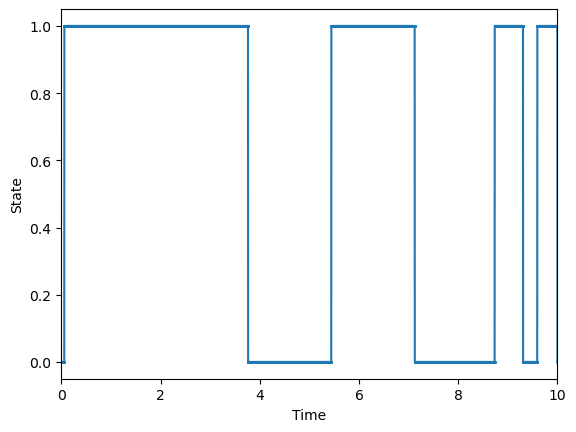

In [139]:
df=pd.DataFrame(data,columns=['Time','State'])
plt.plot(df.Time,df.State,marker='o',markersize=1)
plt.xlim([0,10])
plt.xlabel('Time')
plt.ylabel('State')
#plt.plot([0.5,0.5],[-0.1,1.1],'k--')

In [140]:
ncells=10000
data=[]
for cell in range(1000):
    t=0
    dt=0.01
    s=0
    lamb=10
    tmax=10
    while t<tmax:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
        data.append([cell,t,s])

In [40]:
dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])

In [41]:
data=[]
for time in dfcells.Time.unique():
    dft= dfcells[dfcells.Time==time]
    mnt=np.mean(dft.State)
    var=np.var(dft.State)
    data.append([time,mnt,var])
df=pd.DataFrame(data,columns=['Time','MeanState','Var'])

(0.0, 1.0)

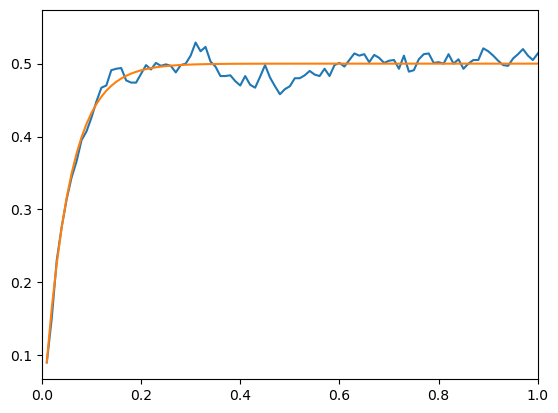

In [42]:
plt.plot(df.Time,df.MeanState)
plt.plot(df.Time,(1-np.exp(-2*lamb*df.Time))/2)
plt.xlim(0,1)

In [153]:
def evolve(lamb,tmax,s):
    tr=-(1/lamb)*np.log(np.random.rand())
    t=0
    if tr>tmax:
        return s
    else:
        while t+tr<tmax:
            s=s+1
            t=t+tr
            tr=-(1/lamb)*np.log(np.random.rand())
        return s

In [171]:
ncells=100
data=[]
for cell in tqdm(range(ncells)):
    t=0
    dt=0.01
    s=0
    lamb=10
    tmax=10
    while t<tmax:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
        data.append([cell,t,s])
dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 175.04it/s]


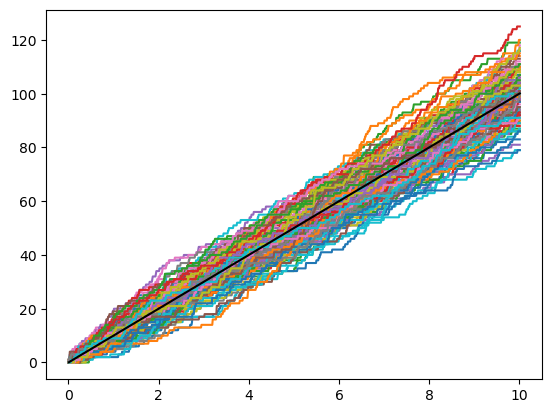

In [172]:
for cell in dfcells.Cell.unique():
    dfcell=dfcells[dfcells.Cell==cell]
    plt.plot(dfcell.Time,dfcell.State)
plt.plot(dfcells.Time,lamb*dfcells.Time,'k')

In [162]:
from tqdm import tqdm

In [166]:
ncells=1000
data=[]
for cell in tqdm(range(ncells)):
    t=0
    dt=0.01
    s=0
    lamb=10
    tmax=10
    while t<tmax:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
        data.append([cell,t,s])
        #dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 133.17it/s]


In [167]:
dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])

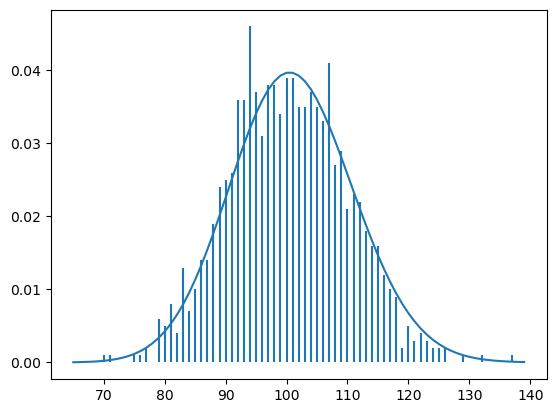

In [170]:
from scipy.stats import poisson
dft=dfcells[dfcells.Time==dfcells.Time.tolist()[-1]]
unique_values, counts = np.unique(dft.State.tolist(), return_counts=True)
plt.vlines(unique_values,0,counts/np.sum(counts))
x=np.arange(65,140)
pmf=poisson.pmf(x, mu=lamb*10.1)
plt.plot(x,pmf)

In [84]:
data=[]
for time in dfcells.Time.unique():
    dft= dfcells[dfcells.Time==time]
    mnt=np.mean(dft.State)
    var=np.var(dft.State)
    data.append([time,mnt,var])
df=pd.DataFrame(data,columns=['Time','MeanState','Var'])

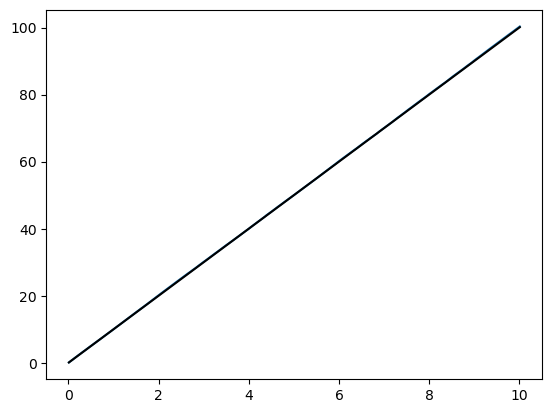

In [86]:
plt.plot(df.Time,df.MeanState)
plt.plot(dfcells.Time,lamb*dfcells.Time,'k')

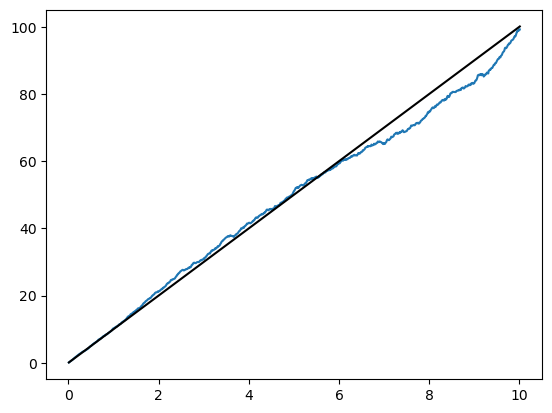

In [87]:
plt.plot(df.Time,df.Var)
plt.plot(dfcells.Time,lamb*dfcells.Time,'k')

In [99]:
ncells=100
data=[]
for cell in tqdm(range(ncells)):
    t=0
    dt=0.001
    s=0
    lamb=10
    tmax=10
    while s<50:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
        data.append([cell,t,s])

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 67.67it/s]


In [100]:
dfcells=pd.DataFrame(data,columns=['Cell','Time','State'])

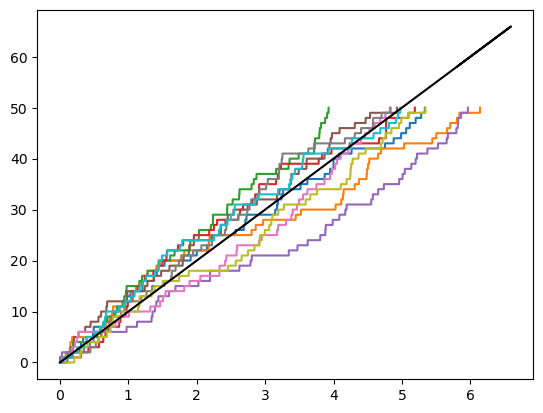

In [101]:
for cell in dfcells.Cell.unique()[:10]:
    dfcell=dfcells[dfcells.Cell==cell]
    plt.plot(dfcell.Time,dfcell.State)
plt.plot(dfcells.Time,lamb*dfcells.Time,'k')

In [103]:
ncells=1000
data=[]
for cell in tqdm(range(ncells)):
    t=0
    dt=0.001
    s=0
    lamb=10
    tmax=10
    while s<50:
        s=evolve(lamb=lamb,tmax=dt,s=s)
        t+=dt
    data.append([cell,t])

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 76.97it/s]


In [132]:
from scipy.stats import erlang
xarr=np.linspace(0,10,100)
pdf=erlang.pdf(xarr, a=50,scale=1/10)

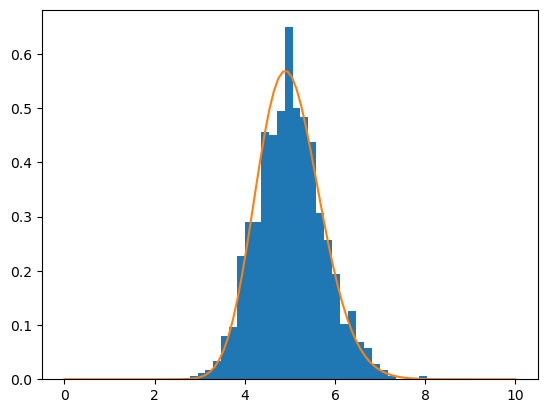

In [134]:
dfcells=pd.DataFrame(data,columns=['Cell','Time'])
plt.hist(dfcells.Time,bins=30,density=True);
plt.plot(xarr,pdf)